In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sohil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Draw Pie Chart
def draw_pie_chart_go(labels, values, title):
    colorscale = 'dark'
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=title)
    fig.show()       
    
def draw_bar_chart(df, x, y, title, column_name, y_name):
    import plotly.express as px

    # Set a dark color palette directly within Plotly Express
    fig = px.bar(df, x=x, y=y, color_discrete_sequence=["darkred"], text=y, title=title)

    # Update layout for better appearance
    fig.update_layout(
        xaxis_title=column_name.capitalize(),
        yaxis_title=y_name.capitalize(),
        font=dict(size=14, family="Arial"),
        title_font=dict(size=18, family="Arial", color="black"),
        title_x=0.5  # Center the title
    )

    # Show the plot
    fig.show()    

In [3]:
df = pd.read_csv('amazon_alexa.tsv', delimiter= '\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## Data Exploration

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
countVec = CountVectorizer(stop_words= 'english')
print(countVec)
words = countVec.fit_transform(df.verified_reviews)
# words
# Combine all reviews
reviews = " ".join([review for review in df['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)


CountVectorizer(stop_words='english')


## Preprocessing


In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
stop_words = set(stopwords.words('english'))


## Remove spaces, symbols and digits, Apply Lower


In [6]:
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove symbols
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text
#_____________________________Stop Words___________________________________________________________
def remove_stop_words(review):
    word_tokens = word_tokenize(review)
    filtered_review = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_review)

#____________________________Special characters____________________________________
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

#________________________________ remove duplicate_words__________________________________
def remove_duplicate_words(text):
    words = text.split()
    unique_words = list(dict.fromkeys(words))
    return ' '.join(unique_words)


#_________________________________remove numbers and spaces_______________________________________________
def remove_numbers_and_spaces(text):
    return ''.join([char for char in str(text) if not char.isdigit() and char != '""' ])


#______________________________Remove emojis_______________________________________________________
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
# # Clean the text
# df['cleaned_reviews'] = df['cleaned_reviews'].apply(clean_text)

# # Remove stop words
# df['cleaned_reviews'] = df['cleaned_reviews'].apply(remove_stop_words)

# #Remove Special Characters
# df['cleaned_reviews'] = df['cleaned_reviews'].apply(remove_special_characters)

# # Remove emojis
# df['cleaned_reviews'] = df['cleaned_reviews'].apply(remove_emojis)

# #
# df['cleaned_reviews'] = df['cleaned_reviews'].apply(remove_numbers_and_spaces)

# #
# df['cleaned_reviews'] = df['cleaned_reviews'].apply(remove_duplicate_words)

In [7]:
# Take list
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    """Cleans and preprocesses a single text string while preserving meaning."""
    # Lower text
    text = text.lower()
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove special characters, numbers, and emojis
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    words = text.split()

    # Remove stop words while preserving negation
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    filtered_words = [word for word in words if word not in stop_words]

    # Remove single character words
    filtered_words = [word for word in filtered_words if len(word) > 1]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)

def preprocess_sentences(sentences):
    """Preprocesses a list of sentences."""
    return [preprocess_text(sentence) for sentence in sentences]


In [8]:
preprocess_text("i do not loved and love@    #")

'not loved love'

In [9]:
preprocess_text('loved')

'loved'

In [10]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [11]:
df['cleaned_reviews'] = df['verified_reviews'].apply(preprocess_text)

### Remove Empty Reviews

In [12]:
def remove_empty_reviews(df, column_name):
    # Check for empty or whitespace-only reviews
    df = df[df[column_name].str.strip().astype(bool)]
    return df

df = remove_empty_reviews(df, 'cleaned_reviews')
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learns dinosaur control l...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


# Glove

In [13]:
import numpy as np
from nltk.tokenize import word_tokenize

def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Use a raw string to avoid unicode escape errors
glove_embeddings = load_glove_embeddings(r"D:\NLP\Amazon\Alexa\glove.6B.100d.txt\glove.6B.100d.txt")

def get_glove_embedding(text, embeddings_index, embedding_dim=100):
    words = word_tokenize(text)
    embeddings = [embeddings_index.get(word, np.zeros(embedding_dim)) for word in words]
    if embeddings:
        return np.mean(embeddings, axis=0)
    return np.zeros(embedding_dim)

# Assuming df_new is defined and contains a 'verified_reviews' column
X_glove = np.array([get_glove_embedding(review, glove_embeddings) for review in df['verified_reviews']])


In [14]:
X_glove

array([[ 0.11624825,  0.096225  ,  0.3029075 , ..., -0.08053925,
         0.176295  ,  0.38271751],
       [ 0.02602667,  0.22057334,  0.49202333, ..., -0.12049567,
         0.25322667,  0.35579334],
       [-0.12726818,  0.22724022,  0.46986888, ..., -0.18408564,
         0.48118478,  0.17580856],
       ...,
       [-0.12988522,  0.21563742,  0.42563792, ..., -0.35506614,
         0.50676874,  0.30844042],
       [-0.11831155,  0.22977848,  0.40940623, ..., -0.32730927,
         0.49408776,  0.22516809],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Imbalanced Data Handling

In [15]:
X = X_glove
y = df.feedback
print(X.shape, y.shape)
## Dataset split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
print(X_train.shape, X_test.shape,'\n',y_train.value_counts())


from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# SMOTE Handling
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled , test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape,'\n',y_train.value_counts())

(3064, 100) (3064,)
(2144, 100) (920, 100) 
 1    1981
0     163
Name: feedback, dtype: int64
(3169, 100) (793, 100) 
 0    1596
1    1573
Name: feedback, dtype: int64


In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Random Forest Classifier

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Cross-Validation Accuracy: 95.48%
Standard Deviation: 0.13%


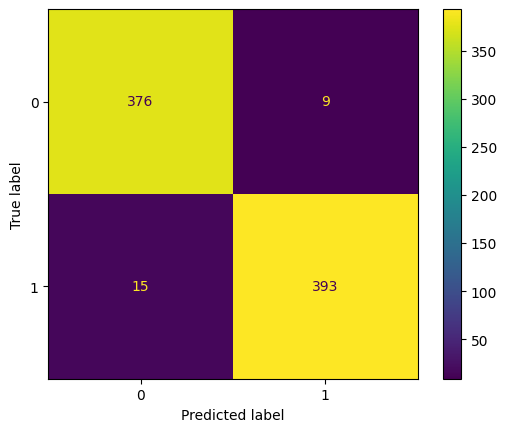

Random Forest Classifier Accuracy: 96.97


In [17]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# from sklearn.model_selection import GridSearchCV, cross_validate
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize the GridSearchCV with RandomForestClassifier
# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best model from GridSearchCV
# best_rf = grid_search.best_estimator_

# # Print the cross-validation results from GridSearchCV
# cv_results = grid_search.cv_results_
# print(f'Best Parameters: {grid_search.best_params_}')
# print(f'Cross-Validation Accuracy: {np.mean(cv_results["mean_test_score"]) * 100:.2f}%')
# print(f'Standard Deviation: {np.std(cv_results["std_test_score"]) * 100:.2f}%')

# # Fit the best model on the entire training set (already done in GridSearchCV)
# # Predict on the test set using the best model
# y_pred = best_rf.predict(X_test)

# # Compute the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Display the confusion matrix
# cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf.classes_)
# cm_display.plot()
# plt.show()

# # Print accuracy on the test set
# print('Random Forest Classifier Accuracy:', (accuracy_score(y_test, y_pred) * 100.0).round(2))


In [18]:
# Feedback texts
new_texts = [
    "I love this product. It's great!",         # Positive
    "This is terrible. I am very unhappy.",    # Negative
    "Excellent quality and service!",           # Positive
    "Delivery was slow and the item is average.", # Neutral (could be adjusted based on context)
    "Very satisfied with my purchase.",         # Positive
    "Not worth the money. Very disappointed.",  # Negative
    "Good product, fast delivery.",             # Positive
    "The item does not match the description.", # Negative
    "Great deal. Would buy again.",             # Positive
    "Item arrived damaged. Poor packaging.",    # Negative
    "Expected better performance.",              # Negative
    "Fantastic quality and service.",           # Positive
    "Customer service was poor.",               # Negative
    "The product is fine but overpriced.",      # Neutral (could be adjusted based on context)
    "Great experience. Highly recommended!",    # Positive
    "Received a defective item.",               # Negative
    "Very pleased with the quality.",           # Positive
    "Received wrong item, not satisfied.",      # Negative
    "Okay product but not great value.",        # Neutral (could be adjusted based on context)
    "Excellent overall. Very happy with it!"    # Positive
]

# True labels for binary classification
true_labels = [
    1,  # Positive: "I love this product. It's great!"
    0,  # Negative: "This is terrible. I am very unhappy."
    1,  # Positive: "Excellent quality and service!"
    0,  # Negative: "Delivery was slow and the item is average."
    1,  # Positive: "Very satisfied with my purchase."
    0,  # Negative: "Not worth the money. Very disappointed."
    1,  # Positive: "Good product, fast delivery."
    0,  # Negative: "The item does not match the description."
    1,  # Positive: "Great deal. Would buy again."
    0,  # Negative: "Item arrived damaged. Poor packaging."
    0,  # Negative: "Expected better performance."
    1,  # Positive: "Fantastic quality and service."
    0,  # Negative: "Customer service was poor."
    0,  # Negative: "The product is fine but overpriced."
    1,  # Positive: "Great experience. Highly recommended!"
    0,  # Negative: "Received a defective item."
    1,  # Positive: "Very pleased with the quality."
    0,  # Negative: "Received wrong item, not satisfied."
    0,  # Negative: "Okay product but not great value."
    1   # Positive: "Excellent overall. Very happy with it!"
]
preprocess_sentences(new_texts)


['love product great',
 'terrible unhappy',
 'excellent quality service',
 'delivery slow item average',
 'satisfied purchase',
 'not worth money disappointed',
 'good product fast delivery',
 'item not match description',
 'great deal would buy',
 'item arrived damaged poor packaging',
 'expected better performance',
 'fantastic quality service',
 'customer service poor',
 'product fine overpriced',
 'great experience highly recommended',
 'received defective item',
 'pleased quality',
 'received wrong item not satisfied',
 'okay product not great value',
 'excellent overall happy']

In [19]:
# Define new texts
new_texts = [
    "I love this product! It's absolutely fantastic.",
    "The customer service was terrible, and the product didn't work.",
    "Fast shipping and great quality! Highly recommend.",
    "Very disappointed. The item arrived damaged and was late.",
    "Tried to play certain broadway shows like Camelot and it gives ne the group Camelot.",
    "Still learning all the capabilities...but so far pretty pretty pretty good	",
    "I love it, wife hates it.",
    "Love my Echo. Still learning how every thing works but having tons of fun.",
    "Just like the other one	",
    "Just what I expected...."
]
preprocess_sentences(new_texts)
true_labels = [1, 0, 1, 0, 0, 1, 1, 1, 1, 1]


In [20]:
new_texts_preprocessed =preprocess_sentences(new_texts)
new_texts_preprocessed
X_new_glove = np.array([get_glove_embedding(review, glove_embeddings) for review in new_texts_preprocessed])
X_new_glove
X_new_vectorized =X_new_glove
# Predict with Random Forest
y_pred_rf = best_rf.predict(X_new_vectorized)
def predict_and_evaluate(classifier, X, y_true, model_name):
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y_true, y_pred) * 100
    print(f"{model_name} Predictions: {y_pred}")
    print(f"{model_name} Accuracy: {accuracy}\n\n")
    
predict_and_evaluate(best_rf,X_new_vectorized, true_labels, "Random Forest")

Random Forest Predictions: [1 0 0 0 0 1 1 0 1 0]
Random Forest Accuracy: 70.0




In [21]:
true_labels=[1,1,1,0,0,0]
new_texts =['Exceptional items' , 'Incredible merchandise', 'Top-notch offerings', 'Subpar item','Poorly made item','Low-quality good']
preprocess_sentences(new_texts)


['exceptional item',
 'incredible merchandise',
 'topnotch offering',
 'subpar item',
 'poorly made item',
 'lowquality good']

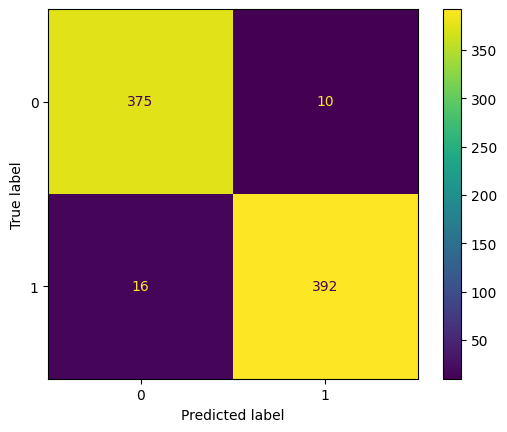

Random Forest Classifier 96.72


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
confusion_matrix_random_forest = confusion_matrix(y_test,random_forest.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_random_forest,display_labels=random_forest.classes_)
cm_display.plot()
plt.show()
print('Random Forest Classifier' , (accuracy_score(y_test,random_forest.predict(X_test)) * 100.0).round(2))

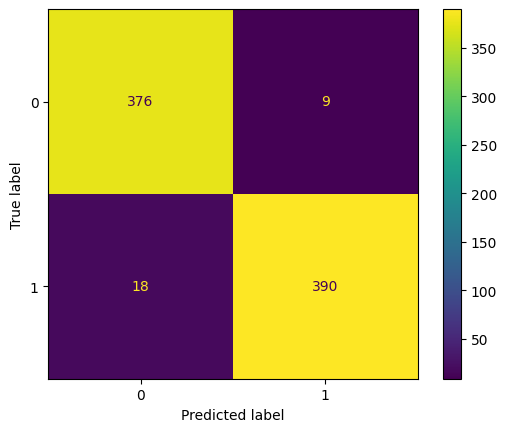

Random Forest Classifier 96.72


In [23]:
random_forest_40estimator = RandomForestClassifier(n_estimators= 40)
random_forest_40estimator.fit(X_train, y_train)
confusion_matrix_random_forest = confusion_matrix(y_test,random_forest_40estimator.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_random_forest,display_labels=random_forest_40estimator.classes_)
cm_display.plot()
plt.show()
print('Random Forest Classifier' , (accuracy_score(y_test,random_forest.predict(X_test)) * 100.0).round(2))

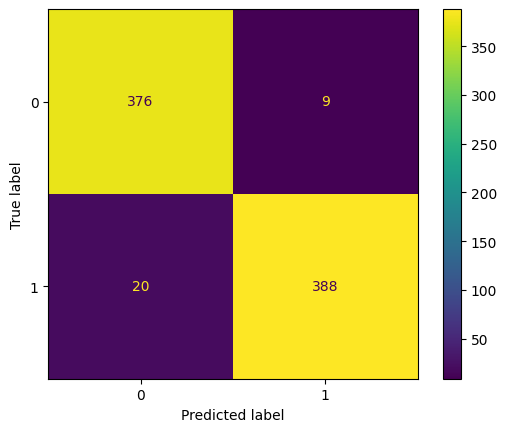

Random Forest Classifier 96.72


In [24]:
random_forest_90estimators = RandomForestClassifier(n_estimators= 90)
random_forest_90estimators.fit(X_train, y_train)
confusion_matrix_random_forest = confusion_matrix(y_test,random_forest_90estimators.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_random_forest,display_labels=random_forest_90estimators.classes_)
cm_display.plot()
plt.show()
print('Random Forest Classifier' , (accuracy_score(y_test,random_forest.predict(X_test)) * 100.0).round(2))

# GradientBoostingClassifier
 combines multiple weak models (typically decision trees) into a strong predictive model. It's an ensemble method that iteratively improves the performance of the model by focusing on the errors made by previous models.

 *Advantages of Gradient Descent*
Simplicity: Relatively easy to understand and implement.

Efficiency: Can be computationally efficient, especially for large datasets.

Wide Applicability: Used in various optimization problems, from linear regression to neural networks.

Flexibility: Can be adapted to different types of functions and constraints.

*Disadvantages of Gradient Descent*
Sensitivity to Initial Values: The algorithm's performance can be influenced by the initial starting point.

Local Minima: Gradient descent can get stuck in local minima, preventing it from finding the global minimum.

Learning Rate: Choosing the appropriate learning rate is crucial. A too-large learning rate can lead to divergence, while a too-small learning rate can slow down convergence.
Slow Convergence: For complex functions, convergence can be slow.

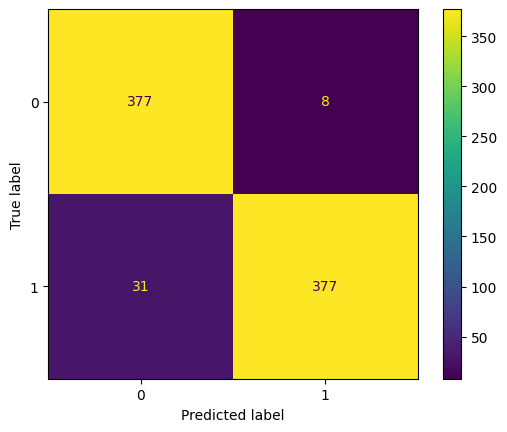

Gradient Boosting Classifier Accuracy: 95.08
F1 Score: 0.95
Precision Score: 0.98
Recall Score: 0.92


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

confusion_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_gbc, display_labels=gbc.classes_)
cm_display.plot()
plt.show()

accuracy_gbc = accuracy_score(y_test, y_pred_gbc) * 100.0
print('Gradient Boosting Classifier Accuracy:', accuracy_gbc.round(2))

# F1 Score
f1_gbc = f1_score(y_test, y_pred_gbc)
print(f"F1 Score: {f1_gbc:.2f}")

# Precision Score
precision_gbc = precision_score(y_test, y_pred_gbc).round(2)
print('Precision Score:', precision_gbc)

# Recall Score
recall_gbc = recall_score(y_test, y_pred_gbc).round(2)
print('Recall Score:', recall_gbc)

## XGBoost
XGBoost builds an ensemble of decision trees iteratively, where each subsequent tree aims to correct the errors of the previous ones. 
Advantages of XGBoost
High Performance: Often achieves state-of-the-art results on various datasets.
Scalability: Handles large datasets efficiently and can be distributed across multiple machines.
Regularization: Built-in regularization prevents overfitting.
Flexibility: Can be applied to different types of problems.
Efficiency: Optimized for speed and memory usage.



*Advantages of XGBoost*
Performance:
XGBoost is often faster and more accurate than other gradient boosting methods due to its optimizations.
Regularization:
Built-in regularization helps prevent overfitting and improves model generalization.
Handling of Missing Values:
Efficiently handles missing data without requiring imputation.
Feature Importance:
Provides methods to evaluate feature importance, aiding in model interpretability.
Scalability:
Designed to handle large datasets and parallelize computations, making it suitable for big data.

*Disadvantages of XGBoost*
Complexity:
The model can become complex, making it harder to interpret compared to simpler models.
Computational Resources:
While efficient, it still requires substantial computational resources, especially with large datasets and many boosting rounds.
Hyperparameter Tuning:
XGBoost has many hyperparameters that need careful tuning to achieve optimal performance.

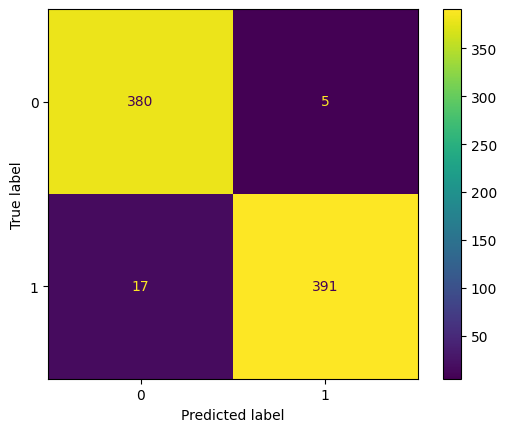

XGBoostClassifier Classifier 97.23
F1 Score: 0.97 
precision_score =  0.99 
recall score =  0.96


In [36]:
from xgboost import XGBClassifier
XGBoostClassifier = XGBClassifier()
XGBoostClassifier.fit(X_train, y_train)
confusion_matrix_XGBoostClassifier = confusion_matrix(y_test,XGBoostClassifier.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_XGBoostClassifier,
                                    display_labels=XGBoostClassifier.classes_)
cm_display.plot()
plt.show()

y_pred_XGBClassifier = XGBoostClassifier.predict(X_test)
print('XGBoostClassifier Classifier' , (accuracy_score(y_test,y_pred_XGBClassifier) * 100.0).round(2))

f1 = f1_score(y_test,y_pred_XGBClassifier)
print(f"F1 Score: {f1:.2f}",
      '\nprecision_score = ', precision_score(y_test,y_pred_XGBClassifier).round(2),
      '\nrecall score = ', recall_score(y_test,y_pred_XGBClassifier).round(2))

# AdaBoost Classifier
*Advantages* of AdaBoost include its improved accuracy, focus on hard cases, flexibility with different base learners, and robustness to overfitting when used properly. 

*Disadvantages* such as sensitivity to noisy data, computational intensity, potential poor performance with overly simple weak learners, and risk of overfitting if not tuned correctly. 

c:\Users\sohil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



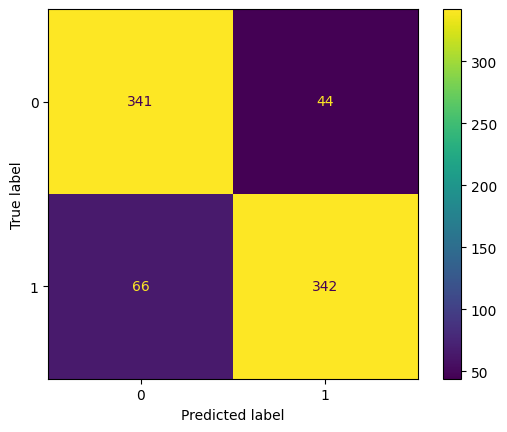

AdaBoostClassifier Classifier 86.13
F1 Score: 0.86 
precision_score =  0.89 
recall score =  0.84


In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize base model
base_model = DecisionTreeClassifier(max_depth=1)  # Decision stump

# Initialize AdaBoost
ada_boost_classifier = AdaBoostClassifier(base_estimator=base_model, 
                                          n_estimators=50, 
                                          random_state=42)

# Train the model
ada_boost_classifier.fit(X_train, y_train)

# Make predictions
y_pred_ada_boost_classifier = ada_boost_classifier.predict(X_test)

# Calculate confusion matrix
confusion_matrix_AdaBoostClassifier = confusion_matrix(y_test, y_pred_ada_boost_classifier)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_AdaBoostClassifier,
                                    display_labels=ada_boost_classifier.classes_)
cm_display.plot()
plt.show()

print('AdaBoostClassifier Classifier' , (accuracy_score(y_test,y_pred_ada_boost_classifier) * 100.0).round(2))

f1 = f1_score(y_test,y_pred_ada_boost_classifier)
print(f"F1 Score: {f1:.2f}",
      '\nprecision_score = ', precision_score(y_test,y_pred_ada_boost_classifier).round(2),
      '\nrecall score = ', recall_score(y_test,y_pred_ada_boost_classifier).round(2))

## Decision Tree Classifier

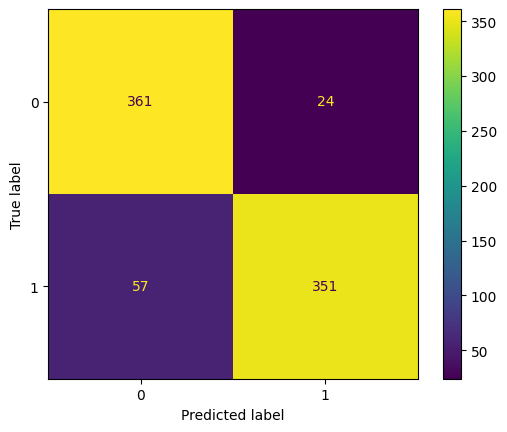

Decision Tree Classifier 89.79
F1 Score: 0.90 
precision_score =  0.94 
recall score =  0.86


In [38]:
from sklearn.tree import DecisionTreeClassifier
dessigionTreeClassifier = DecisionTreeClassifier()

dessigionTreeClassifier.fit(X_train,y_train)

y_pred_dessigionTreeClassifier = dessigionTreeClassifier.predict(X_test)

confusion_matrix_dessigionTreeClassifier = confusion_matrix(y_test,
                                                            dessigionTreeClassifier.predict(X_test))

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dessigionTreeClassifier,
                                    display_labels=dessigionTreeClassifier.classes_)
cm_display.plot()
plt.show()

print('Decision Tree Classifier' , (accuracy_score(y_test,y_pred_dessigionTreeClassifier) * 100.0).round(2))

f1 = f1_score(y_test,y_pred_dessigionTreeClassifier)
print(f"F1 Score: {f1:.2f}",
      '\nprecision_score = ', precision_score(y_test,y_pred_dessigionTreeClassifier).round(2),
      '\nrecall score = ', recall_score(y_test,y_pred_dessigionTreeClassifier).round(2))


# KNN

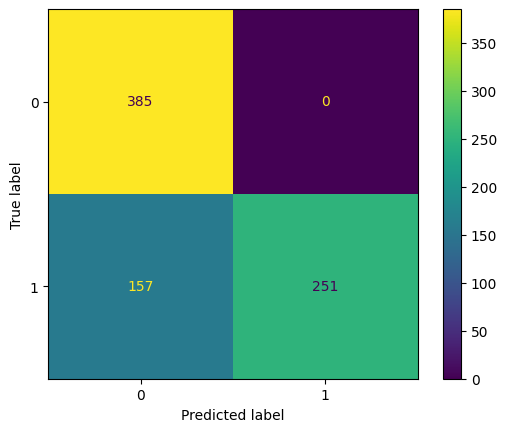

KNN Classifier Classifier 80.2
F1 Score: 0.76 
precision_score =  1.0 
recall score =  0.62


In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
confusion_matrix_KNN = confusion_matrix(y_test,
                                        knn.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_KNN,
                                    display_labels=knn.classes_)
cm_display.plot()
plt.show()
y_pred_knn = knn.predict(X_test)
print('KNN Classifier Classifier' , (accuracy_score(y_test,
                                                    y_pred_knn) * 100.0).round(2))

f1 = f1_score(y_test,y_pred_knn)
print(f"F1 Score: {f1:.2f}",
      '\nprecision_score = ', precision_score(y_test,y_pred_knn).round(2),
      '\nrecall score = ', recall_score(y_test,y_pred_knn).round(2))

# Logistic regression (Normal Equation)

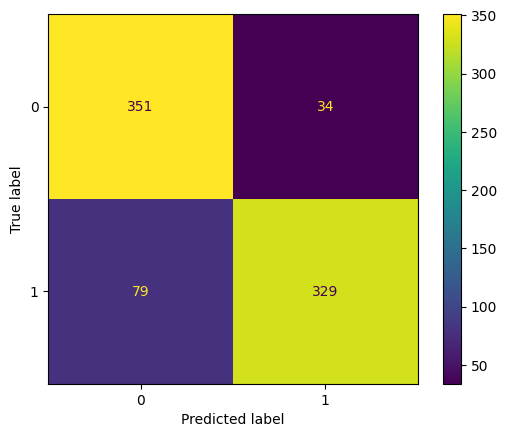

Logistic Regression Classifier Accuracy: 85.75
F1 Score: 0.85 
Precision Score:  0.91 
Recall Score:  0.81


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

logistic_regression.fit(X_train, y_train)

y_pred_logistic = logistic_regression.predict(X_test)

confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_logistic,
                                    display_labels=logistic_regression.classes_)
cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, y_pred_logistic)
print('Logistic Regression Classifier Accuracy:', (accuracy * 100.0).round(2))

f1 = f1_score(y_test, y_pred_logistic)
print(f"F1 Score: {f1:.2f}",
      '\nPrecision Score: ', precision_score(y_test, y_pred_logistic).round(2),
      '\nRecall Score: ', recall_score(y_test, y_pred_logistic).round(2))


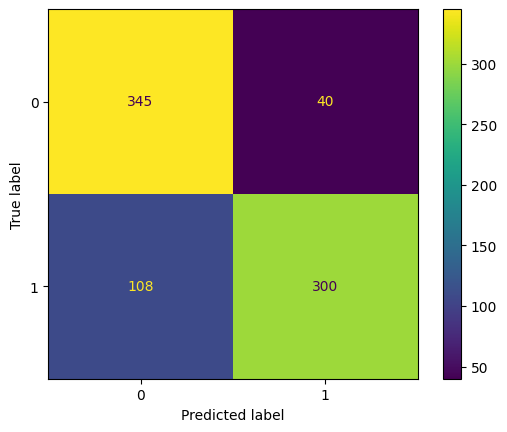

Logistic Regression Classifier Accuracy: 81.34
F1 Score: 0.80 
Precision Score:  0.88 
Recall Score:  0.74


In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0

    for _ in range(num_iterations):
        # Linear model
        z = np.dot(X, w) + b
        # Predictions
        y_pred = sigmoid(z)
        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b

# Predict function using learned parameters
def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b) >= 0.5


# Train model using gradient descent
w, b = gradient_descent(X_train, y_train, learning_rate=0.01, num_iterations=1000)

# Make predictions
y_pred = predict(X_test, w, b)

# Calculate confusion matrix
confusion_matrix_logistic = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_logistic,
                                    display_labels=[0,1])
cm_display.plot()
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Classifier Accuracy:', (accuracy * 100.0).round(2))

# Calculate other metrics
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}",
      '\nPrecision Score: ', precision_score(y_test, y_pred).round(2),
      '\nRecall Score: ', recall_score(y_test, y_pred).round(2))

# Naive Bayes

In [42]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
# import matplotlib.pyplot as plt

# # Initialize Naive Bayes classifier
# naive_bayes = MultinomialNB()

# # Train the model
# naive_bayes.fit(X_train, y_train)

# # Make predictions
# y_pred_nb = naive_bayes.predict(X_test)

# # Calculate confusion matrix
# confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# # Display confusion matrix
# cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_nb,
#                                     display_labels=naive_bayes.classes_)
# cm_display.plot()
# plt.show()

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred_nb)
# print('Naive Bayes Classifier Accuracy:', (accuracy * 100.0).round(2))

# # Calculate other metrics
# f1 = f1_score(y_test, y_pred_nb)
# precision = precision_score(y_test, y_pred_nb)
# recall = recall_score(y_test, y_pred_nb)

# print(f"F1 Score: {f1:.2f}",
#       '\nPrecision Score: ', precision.round(2),
#       '\nRecall Score: ', recall.round(2))


# SVC

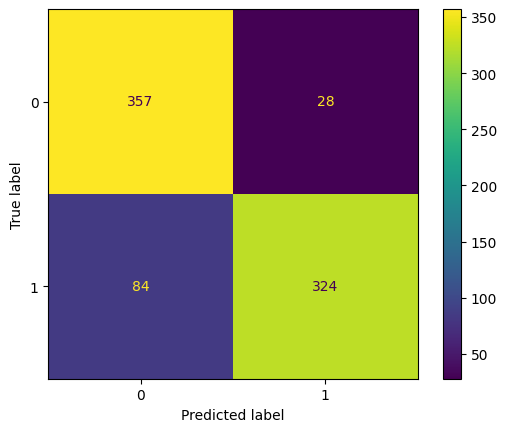

SVC Classifier Accuracy: 85.88
F1 Score: 0.85 
Precision Score:  0.92 
Recall Score:  0.79


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize SVC
svc = SVC(kernel='linear', random_state=42)

# Train the model
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)

# Calculate confusion matrix
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svc,
                                    display_labels=svc.classes_)
cm_display.plot()
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svc)
print('SVC Classifier Accuracy:', (accuracy * 100.0).round(2))

# Calculate other metrics
f1 = f1_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)

print(f"F1 Score: {f1:.2f}",
      '\nPrecision Score: ', precision.round(2),
      '\nRecall Score: ', recall.round(2))


In [56]:
new_texts_preprocessed =preprocess_sentences(new_texts)
new_texts_preprocessed
X_new_glove = np.array([get_glove_embedding(review, glove_embeddings) for review in new_texts_preprocessed])
X_new_glove
X_new_vectorized =X_new_glove
# Predict with Random Forest
y_pred_rf = best_rf.predict(X_new_vectorized)
def predict_and_evaluate(classifier, X, y_true, model_name):
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y_true, y_pred) * 100
    print(f"{model_name} Predictions: {y_pred}")
    print(f"{model_name} Accuracy: {accuracy}\n\n")
    
predict_and_evaluate(best_rf,X_new_vectorized, true_labels, "Random Forest")


preprocess_text('I don not    KNOW!')    

Random Forest Predictions: [1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1]
Random Forest Accuracy: 80.0




'not know'

In [54]:
preprocess_text('Yes,   @@that is not is great')

'yes not great'

In [ ]:
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer

# def clean_text(text):
#   """Cleans text by removing unwanted characters and normalizing text."""
#   text = text.lower()
#   text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
#   text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
#   return text

# def remove_stopwords(text):
#   """Removes stop words from text."""
#   stop_words = set(stopwords.words('english'))
#   words = text.split()
#   filtered_words = [word for word in words if word not in stop_words]
#   return ' '.join(filtered_words)

# def lemmatize_text(text):
#   """Lemmatizes text to reduce words to their root form."""
#   lemmatizer = WordNetLemmatizer()
#   words = text.split()
#   lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
#   return ' '.join(lemmatized_words)

# def preprocess_text(text):
#   """Performs text preprocessing steps."""
#   cleaned_text = clean_text(text)
#   no_stopwords = remove_stopwords(cleaned_text)
#   lemmatized_text = lemmatize_text(no_stopwords)
#   return lemmatized_text

# preprocess_text('I do not like this !@#2')

'like 2'

In [ ]:
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# def preprocess_text(text):
#   """Cleans and preprocesses text while preserving meaning."""
#   # lower text
#   text = text.lower()
  
#   # remove extra spaces
#   text = re.sub(r'\s+', ' ', text).strip()
  
#   # Remove special characters, numbers, and emojis
#   text = re.sub(r'[^a-zA-Z\s]', '', text)
  
#   # Remove extra spaces
#   text = re.sub(r'\s+', ' ', text).strip()

#   # Tokenize
#   words = text.split()

#   # Remove stop words while preserving negation
#   stop_words = set(stopwords.words('english'))
#   stop_words.remove('not')
#   filtered_words = [word for word in words if word not in stop_words]

#   #Removes single character words from a text string.
#   words = text.split()
#   filtered_words = [word for word in words if len(word) > 1]
  

#   # Lemmatization
#   lemmatizer = WordNetLemmatizer()
#   lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

#   # 
#   return ' '.join(lemmatized_words)



In [53]:

print(preprocess_text(' Everything else is 👍🏻 .end'),'\n',
preprocess_text('\"s  favorite songs  e\"'), '\n',
preprocess_text('😍'),'\n',
preprocess_text('not like  !@#2'))

everything else end 
 favorite song 
  
 not like


In [ ]:
# Take list
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    """Cleans and preprocesses a single text string while preserving meaning."""
    # Lower text
    text = text.lower()
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove special characters, numbers, and emojis
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    words = text.split()

    # Remove stop words while preserving negation
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    filtered_words = [word for word in words if word not in stop_words]

    # Remove single character words
    filtered_words = [word for word in filtered_words if len(word) > 1]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)

def preprocess_sentences(sentences):
    """Preprocesses a list of sentences."""
    return [preprocess_text(sentence) for sentence in sentences]


In [ ]:
preprocess_sentences(['I loves', 'Not good', 'vvery bad'])

['love', 'not good', 'vvery bad']

In [ ]:
# # # Define new texts
# # new_texts = [
# #     "I love this product! It's absolutely fantastic.",
# #     "The customer service was terrible, and the product didn't work.",
# #     "Fast shipping and great quality! Highly recommend.",
# #     "Very disappointed. The item arrived damaged and was late.",
# #     "Tried to play certain broadway shows like Camelot and it gives ne the group Camelot.",
# #     "Still learning all the capabilities...but so far pretty pretty pretty good	",
# #     "I love it, wife hates it.",
# #     "Love my Echo. Still learning how every thing works but having tons of fun.",
# #     "Just like the other one	",
# #     "Just what I expected...."
# # ]
# # preprocess_sentences(new_texts)
# # true_labels = [1, 0, 1, 0, 0, 1, 1, 1, 1, 1]


# new_texts = [
#     "This product exceeded my expectations. Great quality and fast shipping!",
#     "I'm very disappointed with this purchase. The item arrived damaged.",
#     "Excellent service! The customer support was very helpful and responsive.",
#     "The product is okay, but it took too long to arrive.",
#     "I love this product! It's exactly what I needed and works perfectly.",
#     "The quality of this item is subpar. I would not recommend it.",
#     "Fast delivery and the product is as described. I'm happy with my purchase.",
#     "The item did not match the description on the website. Very frustrating.",
#     "Great value for the price. Would definitely buy again.",
#     "The packaging was poor, and the item was scratched when I received it.",
#     "I had high hopes for this product, but it did not perform as expected.",
#     "The product is amazing, and I am very satisfied with my purchase.",
#     "Not happy with the service. The response time was very slow.",
#     "The product was delivered on time, but it's not as good as I anticipated.",
#     "Fantastic experience! The product works great, and customer service was excellent.",
#     "The item was defective out of the box. I had to return it.",
#     "I'm very pleased with the quality of this product. Worth every penny.",
#     "The delivery was prompt, but the item was not what I ordered.",
#     "The product is okay, but the price was a bit high for what you get.",
#     "I had a wonderful experience shopping here. The product and service were top-notch."
# ]
# true_labels = [
#     1,  # "This product exceeded my expectations. Great quality and fast shipping!"
#     0,  # "I'm very disappointed with this purchase. The item arrived damaged."
#     1,  # "Excellent service! The customer support was very helpful and responsive."
#     0,  # "The product is okay, but it took too long to arrive."
#     1,  # "I love this product! It's exactly what I needed and works perfectly."
#     0,  # "The quality of this item is subpar. I would not recommend it."
#     1,  # "Fast delivery and the product is as described. I'm happy with my purchase."
#     0,  # "The item did not match the description on the website. Very frustrating."
#     1,  # "Great value for the price. Would definitely buy again."
#     0,  # "The packaging was poor, and the item was scratched when I received it."
#     0,  # "I had high hopes for this product, but it did not perform as expected."
#     1,  # "The product is amazing, and I am very satisfied with my purchase."
#     0,  # "Not happy with the service. The response time was very slow."
#     0,  # "The product was delivered on time, but it's not as good as I anticipated."
#     1,  # "Fantastic experience! The product works great, and customer service was excellent."
#     0,  # "The item was defective out of the box. I had to return it."
#     1,  # "I'm very pleased with the quality of this product. Worth every penny."
#     0,  # "The delivery was prompt, but the item was not what I ordered."
#     0,  # "The product is okay, but the price was a bit high for what you get."
#     1   # "I had a wonderful experience shopping here. The product and service were top-notch."
# ]
# preprocess_sentences(new_texts)

In [48]:
# Feedback texts
new_texts = [
    "I love this product. It's great!",         # Positive
    "This is terrible. I am very unhappy.",    # Negative
    "Excellent quality and service!",           # Positive
    "Delivery was slow and the item is average.", # Neutral (could be adjusted based on context)
    "Very satisfied with my purchase.",         # Positive
    "Not worth the money. Very disappointed.",  # Negative
    "Good product, fast delivery.",             # Positive
    "The item does not match the description.", # Negative
    "Great deal. Would buy again.",             # Positive
    "Item arrived damaged. Poor packaging.",    # Negative
    "Expected better performance.",              # Negative
    "Fantastic quality and service.",           # Positive
    "Customer service was poor.",               # Negative
    "The product is fine but overpriced.",      # Neutral (could be adjusted based on context)
    "Great experience. Highly recommended!",    # Positive
    "Received a defective item.",               # Negative
    "Very pleased with the quality.",           # Positive
    "Received wrong item, not satisfied.",      # Negative
    "Okay product but not great value.",        # Neutral (could be adjusted based on context)
    "Excellent overall. Very happy with it!"    # Positive
]

# True labels for binary classification
true_labels = [
    1,  # Positive: "I love this product. It's great!"
    0,  # Negative: "This is terrible. I am very unhappy."
    1,  # Positive: "Excellent quality and service!"
    0,  # Negative: "Delivery was slow and the item is average."
    1,  # Positive: "Very satisfied with my purchase."
    0,  # Negative: "Not worth the money. Very disappointed."
    1,  # Positive: "Good product, fast delivery."
    0,  # Negative: "The item does not match the description."
    1,  # Positive: "Great deal. Would buy again."
    0,  # Negative: "Item arrived damaged. Poor packaging."
    0,  # Negative: "Expected better performance."
    1,  # Positive: "Fantastic quality and service."
    0,  # Negative: "Customer service was poor."
    0,  # Negative: "The product is fine but overpriced."
    1,  # Positive: "Great experience. Highly recommended!"
    0,  # Negative: "Received a defective item."
    1,  # Positive: "Very pleased with the quality."
    0,  # Negative: "Received wrong item, not satisfied."
    0,  # Negative: "Okay product but not great value."
    1   # Positive: "Excellent overall. Very happy with it!"
]
preprocess_sentences(new_texts)

['love product great',
 'terrible unhappy',
 'excellent quality service',
 'delivery slow item average',
 'satisfied purchase',
 'not worth money disappointed',
 'good product fast delivery',
 'item not match description',
 'great deal would buy',
 'item arrived damaged poor packaging',
 'expected better performance',
 'fantastic quality service',
 'customer service poor',
 'product fine overpriced',
 'great experience highly recommended',
 'received defective item',
 'pleased quality',
 'received wrong item not satisfied',
 'okay product not great value',
 'excellent overall happy']

In [ ]:
# # Define new texts
# new_texts = [
#     "I love this product! It's absolutely fantastic.",
#     "The customer service was terrible, and the product didn't work.",
#     "Fast shipping and great quality! Highly recommend.",
#     "Very disappointed. The item arrived damaged and was late.",
#     "Tried to play certain broadway shows like Camelot and it gives ne the group Camelot.",
#     "Still learning all the capabilities...but so far pretty pretty pretty good	",
#     "I love it, wife hates it.",
#     "Love my Echo. Still learning how every thing works but having tons of fun.",
#     "Just like the other one	",
#     "Just what I expected...."
# ]
# preprocess_sentences(new_texts)
# true_labels = [1, 0, 1, 0, 0, 1, 1, 1, 1, 1]


In [49]:
new_texts_preprocessed =preprocess_sentences(new_texts)
new_texts_preprocessed

['love product great',
 'terrible unhappy',
 'excellent quality service',
 'delivery slow item average',
 'satisfied purchase',
 'not worth money disappointed',
 'good product fast delivery',
 'item not match description',
 'great deal would buy',
 'item arrived damaged poor packaging',
 'expected better performance',
 'fantastic quality service',
 'customer service poor',
 'product fine overpriced',
 'great experience highly recommended',
 'received defective item',
 'pleased quality',
 'received wrong item not satisfied',
 'okay product not great value',
 'excellent overall happy']

In [50]:
X_new_glove = np.array([get_glove_embedding(review, glove_embeddings) for review in new_texts_preprocessed])
X_new_glove

array([[ 0.12466801,  0.4272667 ,  0.48109332, ..., -0.7533867 ,
         0.52562934,  0.46167335],
       [ 0.286965  ,  0.0936785 ,  0.48957998, ...,  0.055695  ,
        -0.23023999, -0.114355  ],
       [-0.19791   ,  0.05880666,  0.01326999, ..., -0.60829264,
         0.4391733 ,  0.5893833 ],
       ...,
       [-0.021596  ,  0.19727199,  0.46858796, ..., -0.23567   ,
         0.2091006 ,  0.10233559],
       [ 0.0722556 ,  0.3193962 ,  0.43996996, ..., -0.5903494 ,
         0.3850006 ,  0.32066602],
       [-0.08339866,  0.107258  ,  0.36836997, ..., -0.35526335,
         0.21379666,  0.27339   ]], dtype=float32)

In [51]:
X_new_vectorized =X_new_glove

Random Forest Accuracy: 45.0




In [ ]:
# Predict with Random Forest
y_pred_rf = random_forest.predict(X_new_vectorized)

# Predict with Random Forest
y_pred_rf = random_forest_40estimator.predict(X_new_vectorized)

# Predict with Random Forest
y_pred_rf = random_forest_90estimators.predict(X_new_vectorized)

# Predict with Gradient Boosting
y_pred_gb = gbc .predict(X_new_vectorized)

# Predict with XGBoost
y_pred_xgb = XGBoostClassifier.predict(X_new_vectorized)

# Predict with AdaBoost
y_pred_ab = ada_boost_classifier.predict(X_new_vectorized)

# Predict with Decision Tree
y_pred_decisiontree = dessigionTreeClassifier.predict(X_new_vectorized)

# Predict with K-Nearest Neighbors
y_pred_knn = knn.predict(X_new_vectorized)

# Predict with Logistic Regression
y_pred_logistic = logistic_regression.predict(X_new_vectorized)

# Predict with Naive Bayes
# y_pred_nb = naive_bayes.predict(X_new_vectorized)

# Predict with Support Vector Classifier
y_pred_svc = svc.predict(X_new_vectorized)


In [63]:
def predict_and_evaluate(classifier, X, y_true, model_name):
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y_true, y_pred) * 100
    # print(f"{model_name} Predictions: {y_pred}")
    print(f"{model_name} Accuracy: {accuracy}\n\n")


new_texts_preprocessed =preprocess_sentences(new_texts)
X_new_glove = np.array([get_glove_embedding(review, glove_embeddings) for review in new_texts_preprocessed])
X_new_vectorized =X_new_glove
# Predict with Random Forest
y_pred_rf = random_forest.predict(X_new_vectorized)

# Predict with Random Forest
y_pred_rf = random_forest_40estimator.predict(X_new_vectorized)

# Predict with Random Forest
y_pred_rf = random_forest_90estimators.predict(X_new_vectorized)

# Predict with Gradient Boosting
y_pred_gb = gbc .predict(X_new_vectorized)

# Predict with XGBoost
y_pred_xgb = XGBoostClassifier.predict(X_new_vectorized)

# Predict with AdaBoost
y_pred_ab = ada_boost_classifier.predict(X_new_vectorized)

# Predict with Decision Tree
y_pred_decisiontree = dessigionTreeClassifier.predict(X_new_vectorized)

# Predict with K-Nearest Neighbors
y_pred_knn = knn.predict(X_new_vectorized)

# Predict with Logistic Regression
y_pred_logistic = logistic_regression.predict(X_new_vectorized)

# Predict with Naive Bayes
# y_pred_nb = naive_bayes.predict(X_new_vectorized)

# Predict with Support Vector Classifier
y_pred_svc = svc.predict(X_new_vectorized)
   
predict_and_evaluate(random_forest,X_new_vectorized, true_labels, "Random Forest")
predict_and_evaluate(random_forest_40estimator,X_new_vectorized, true_labels, "Random Forest with 40 estimators")
predict_and_evaluate(random_forest_90estimators,X_new_vectorized, true_labels, "Random Forest with 90 estimators")

predict_and_evaluate(gbc, X_new_vectorized, true_labels, "Gradient Boosting")

predict_and_evaluate(XGBoostClassifier,X_new_vectorized, true_labels, "XGBoost")

predict_and_evaluate(ada_boost_classifier,X_new_vectorized, true_labels, "AdaBoost")    

predict_and_evaluate(dessigionTreeClassifier,X_new_vectorized, true_labels, "Decision Tree")

predict_and_evaluate(knn,X_new_vectorized, true_labels, "K-Nearest Neighbors")


predict_and_evaluate(logistic_regression, X_new_vectorized, true_labels, "Logistic Regression")

# predict_and_evaluate(naive_bayes,X_new_vectorized, true_labels, "Naive Bayes")

predict_and_evaluate(svc,X_new_vectorized, true_labels, "Support Vector Classifier")



Random Forest Accuracy: 100.0


Random Forest with 40 estimators Accuracy: 100.0


Random Forest with 90 estimators Accuracy: 66.66666666666666


Gradient Boosting Accuracy: 83.33333333333334


XGBoost Accuracy: 83.33333333333334


AdaBoost Accuracy: 50.0


Decision Tree Accuracy: 83.33333333333334


K-Nearest Neighbors Accuracy: 50.0


Logistic Regression Accuracy: 66.66666666666666


Support Vector Classifier Accuracy: 83.33333333333334




In [65]:
true_labels=[1,1,1,0,0,0]
new_texts =['Exceptional items' , 'Incredible merchandise', 'Top-notch offerings', 'Subpar item','Poorly made item','Low-quality good']
preprocess_sentences(new_texts)
def predict_and_evaluate(classifier, X, y_true, model_name):
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y_true, y_pred) * 100
    print(f"{model_name} Predictions: {y_pred}")
    print(f"{model_name} Accuracy: {accuracy}\n\n")


new_texts_preprocessed =preprocess_sentences(new_texts)
X_new_glove = np.array([get_glove_embedding(review, glove_embeddings) for review in new_texts_preprocessed])
X_new_vectorized =X_new_glove
# Predict with Random Forest
y_pred_rf = random_forest.predict(X_new_vectorized)

# Predict with Random Forest
y_pred_rf = random_forest_40estimator.predict(X_new_vectorized)

# Predict with Random Forest
y_pred_rf = random_forest_90estimators.predict(X_new_vectorized)

# Predict with Gradient Boosting
y_pred_gb = gbc .predict(X_new_vectorized)

# Predict with XGBoost
y_pred_xgb = XGBoostClassifier.predict(X_new_vectorized)

# Predict with AdaBoost
y_pred_ab = ada_boost_classifier.predict(X_new_vectorized)

# Predict with Decision Tree
y_pred_decisiontree = dessigionTreeClassifier.predict(X_new_vectorized)

# Predict with K-Nearest Neighbors
y_pred_knn = knn.predict(X_new_vectorized)

# Predict with Logistic Regression
y_pred_logistic = logistic_regression.predict(X_new_vectorized)

# Predict with Naive Bayes
# y_pred_nb = naive_bayes.predict(X_new_vectorized)

# Predict with Support Vector Classifier
y_pred_svc = svc.predict(X_new_vectorized)
   
predict_and_evaluate(random_forest,X_new_vectorized, true_labels, "Random Forest")
predict_and_evaluate(random_forest_40estimator,X_new_vectorized, true_labels, "Random Forest with 40 estimators")
predict_and_evaluate(random_forest_90estimators,X_new_vectorized, true_labels, "Random Forest with 90 estimators")

predict_and_evaluate(gbc, X_new_vectorized, true_labels, "Gradient Boosting")

predict_and_evaluate(XGBoostClassifier,X_new_vectorized, true_labels, "XGBoost")

predict_and_evaluate(ada_boost_classifier,X_new_vectorized, true_labels, "AdaBoost")    

predict_and_evaluate(dessigionTreeClassifier,X_new_vectorized, true_labels, "Decision Tree")

predict_and_evaluate(knn,X_new_vectorized, true_labels, "K-Nearest Neighbors")


predict_and_evaluate(logistic_regression, X_new_vectorized, true_labels, "Logistic Regression")

# predict_and_evaluate(naive_bayes,X_new_vectorized, true_labels, "Naive Bayes")

predict_and_evaluate(svc,X_new_vectorized, true_labels, "Support Vector Classifier")


Random Forest Predictions: [1 1 1 0 0 0]
Random Forest Accuracy: 100.0


Random Forest with 40 estimators Predictions: [1 1 1 0 0 0]
Random Forest with 40 estimators Accuracy: 100.0


Random Forest with 90 estimators Predictions: [0 0 1 0 0 0]
Random Forest with 90 estimators Accuracy: 66.66666666666666


Gradient Boosting Predictions: [1 1 1 0 0 1]
Gradient Boosting Accuracy: 83.33333333333334


XGBoost Predictions: [1 1 1 0 0 1]
XGBoost Accuracy: 83.33333333333334


AdaBoost Predictions: [1 0 1 0 1 1]
AdaBoost Accuracy: 50.0


Decision Tree Predictions: [1 1 1 0 0 1]
Decision Tree Accuracy: 83.33333333333334


K-Nearest Neighbors Predictions: [0 0 0 0 0 0]
K-Nearest Neighbors Accuracy: 50.0


Logistic Regression Predictions: [1 1 1 0 1 1]
Logistic Regression Accuracy: 66.66666666666666


Support Vector Classifier Predictions: [1 1 1 0 0 1]
Support Vector Classifier Accuracy: 83.33333333333334


